# Practicant amb training i test sets

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder, LabelEncoder

In [2]:
import warnings
warnings.simplefilter(action='ignore')

## Exercici 1

Parteix el conjunt de dades DelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

In [3]:
# Load the dataframe
df = pd.read_csv('DelayedFlights.csv')

In [4]:
# View the dataset
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Les columnes que conté són:
- **Unnamed**: índex
- **Year**: any del vol
- **Month**: mes del vol
- **DayofMonth**: dia del vol
- **DayOfWeek**: dia de la setmana del vol 
- **DepTime**: hora de sortida del vol real
- **CRSDepTime**: hora de sortida del vol programada
- **ArrTime**: hora d'arribada del vol real
- **CRSArrTime**: hora d'arribada del vol programada
- **UniqueCarrier**: aerolínea
- **FlightNum**: número de vol
- **TailNum**: número de cua de l'avió
- **ActualElapsedTime**: temps de vol real en minuts
- **CRSElapsedTime**: temps de vol programat en minuts
- **AirTime**: temps en l'aire en minuts
- **ArrDelay**: retràs en l'hora d'arribada en minuts
- **DepDelay**: retràs en l'hora de sortida en minuts
- **Origin**: aeroport de sortida
- **Dest**: aeroport de destinació
- **Distance**: distància del vol
- **Taxiln**: temps de taxi de l'arribada en minuts
- **TaxiOut**: temps de taxi de la sortida en minuts
- **Cancelled**: cancel·lació
- **CancellationCode**: codi de cancel·lació
- **Diverted**: desviat
- **CarrierDelay**: retràs atribuït a l'aerolínea en minuts
- **WeatherDelay**: retràs atribuït al clima en minuts
- **NASDelay**: retràs atribuït al sistema d'aviació nacional en minuts
- **SecurityDelay**: retràs atribuït a la seguretat en minuts
- **LateAircraftDelay**: retràs atribuït a l'arribada amb retràs d'un avió en minuts

Per aquest estudi, les columnes de rellevància seran: Origin, Dest, Distance, UniqueCarrier, ArrDelay, DepDelay i ActualElapsedTime. Així doncs, simplificarem el dataset:

In [5]:
# Feature selection
df = df[['Origin', 'Dest', 'Distance', 'UniqueCarrier', 'ArrDelay', 'DepDelay', 'ActualElapsedTime']]

In [6]:
# View the dataset
df.head()

,Origin,Dest,Distance,UniqueCarrier,ArrDelay,DepDelay,ActualElapsedTime
0,IAD,TPA,810,WN,-14.0,8.0,128.0
1,IAD,TPA,810,WN,2.0,19.0,128.0
2,IND,BWI,515,WN,14.0,8.0,96.0
3,IND,BWI,515,WN,34.0,34.0,90.0
4,IND,JAX,688,WN,11.0,25.0,101.0


In [7]:
# Split the dataset between train and test sets
df_train, df_test = train_test_split(df, test_size=0.25, random_state=1)

In [8]:
# View the train dataset
df_train.head()

,Origin,Dest,Distance,UniqueCarrier,ArrDelay,DepDelay,ActualElapsedTime
305836,DFW,LIT,304,MQ,97.0,100.0,67.0
1733334,ATL,LAX,1946,DL,92.0,66.0,320.0
523089,BGR,DTW,750,9E,6.0,10.0,151.0
1721354,SLC,LGB,589,B6,-6.0,7.0,110.0
927558,CLE,SDF,304,XE,33.0,21.0,87.0


In [9]:
# View the test dataset
df_test.head()

,Origin,Dest,Distance,UniqueCarrier,ArrDelay,DepDelay,ActualElapsedTime
1750755,CLE,BWI,314,WN,6.0,12.0,64.0
1074983,EWR,LAS,2227,CO,18.0,11.0,342.0
46126,ORD,BNA,409,YV,63.0,50.0,103.0
327441,ORF,DTW,529,9E,37.0,63.0,102.0
1363177,ATL,DEN,1199,FL,30.0,13.0,198.0


### Comparison of Origin airports between train and test sets

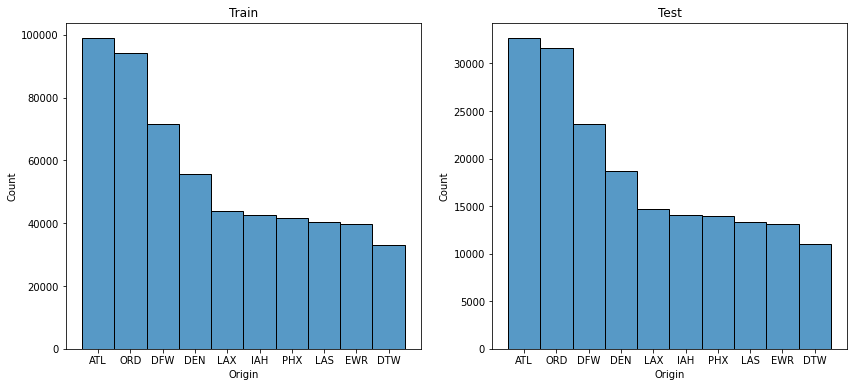

In [10]:
# Get the top 10 origin airports
top10_origin = df.Origin.value_counts().rename_axis('origin').reset_index(name='count').head(10).origin.tolist()

# Get the train data for the top 10 origin airports
train_origin = df_train[df_train.Origin.isin(top10_origin)]
train_origin.Origin = pd.Categorical(train_origin.Origin, categories=top10_origin, ordered=True)
train_origin.sort_values('Origin', inplace=True)

# Get the test data for the top 10 origin airports
test_origin = df_test[df_test.Origin.isin(top10_origin)]
test_origin.Origin = pd.Categorical(test_origin.Origin, categories=top10_origin, ordered=True)
test_origin.sort_values('Origin', inplace=True)

# Plot the train and test data for the top 10 origin airports
fig = plt.figure(figsize=(14, 6))
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,2,1)
sns.histplot(data=train_origin, x="Origin").set_title('Train')
plt.subplot(1,2,2)
sns.histplot(data=test_origin, x="Origin").set_title('Test');

### Comparison of Destination airports between train and test sets

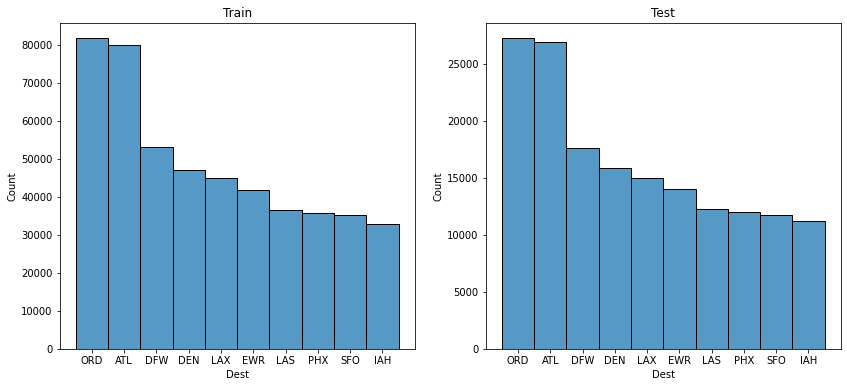

In [11]:
# Get the top 10 destination airports
top10_dest = df.Dest.value_counts().rename_axis('dest').reset_index(name='count').head(10).dest.tolist()

# Get the train data for the top 10 destination airports
train_dest = df_train[df_train.Dest.isin(top10_dest)]
train_dest.Dest = pd.Categorical(train_dest.Dest, categories=top10_dest, ordered=True)
train_dest.sort_values('Dest', inplace=True)

# Get the test data for the top 10 destination airports
test_dest = df_test[df_test.Dest.isin(top10_dest)]
test_dest.Dest = pd.Categorical(test_dest.Dest, categories=top10_dest, ordered=True)
test_dest.sort_values('Dest', inplace=True)

# Plot the train and test data for the top 10 destination airports
fig = plt.figure(figsize=(14, 6))
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,2,1)
sns.histplot(data=train_dest, x="Dest").set_title('Train')
plt.subplot(1,2,2)
sns.histplot(data=test_dest, x="Dest").set_title('Test');

### Comparison of Carriers between train and test sets

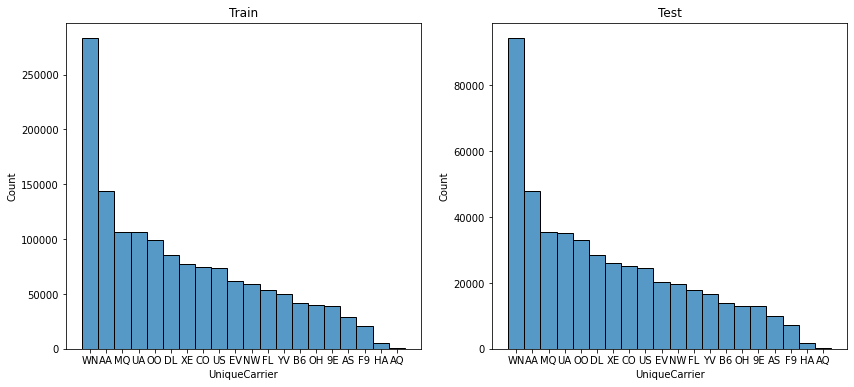

In [12]:
# Sort the carriers
top10_carrier = df.UniqueCarrier.value_counts().rename_axis('carrier').reset_index(name='count').carrier.tolist()

# Get the train data for the carriers
train_carrier = df_train.copy()
train_carrier.UniqueCarrier = pd.Categorical(train_carrier.UniqueCarrier, categories=top10_carrier, ordered=True)
train_carrier.sort_values('UniqueCarrier', inplace=True)

# Get the test data for the carriers
test_carrier = df_test.copy()
test_carrier.UniqueCarrier = pd.Categorical(test_carrier.UniqueCarrier, categories=top10_carrier, ordered=True)
test_carrier.sort_values('UniqueCarrier', inplace=True)

# Plot the train and test data for the carriers
fig = plt.figure(figsize=(14, 6))
plt.subplots_adjust(hspace=0.4)
plt.subplot(1,2,1)
sns.histplot(data=train_carrier, x="UniqueCarrier").set_title('Train')
plt.subplot(1,2,2)
sns.histplot(data=test_carrier, x="UniqueCarrier").set_title('Test');

### Comparison of flight Distance between train and test sets

In [13]:
df_train['class'] = 'Train'
df_test['class'] = 'Test'
df_train_test = pd.concat([df_train, df_test])

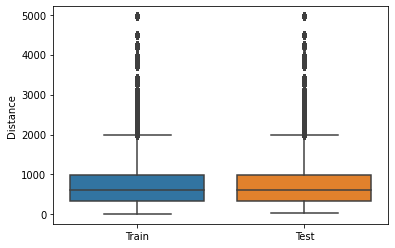

In [14]:
sns.boxplot(x='class', y='Distance', data=df_train_test).set_xlabel('');

### Comparison of flight ArrDelay between train and test sets

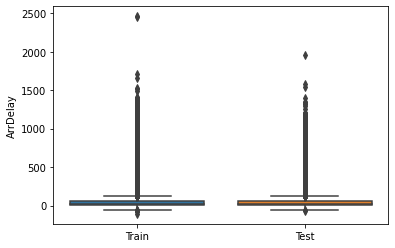

In [15]:
sns.boxplot(x='class', y='ArrDelay', data=df_train_test).set_xlabel('');

### Comparison of flight DepDelay between train and test sets

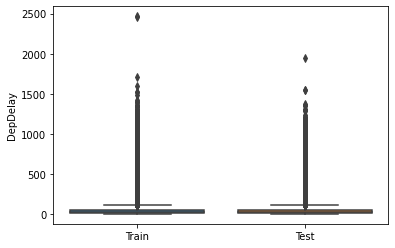

In [16]:
sns.boxplot(x='class', y='DepDelay', data=df_train_test).set_xlabel('');

### Comparison of flight ActualElapsedTime between train and test sets

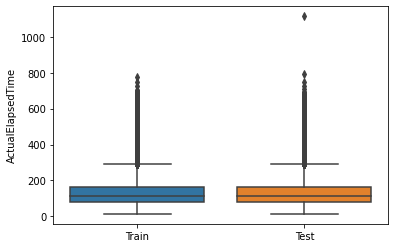

In [17]:
sns.boxplot(x='class', y='ActualElapsedTime', data=df_train_test).set_xlabel('');

## Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [18]:
num_cols = ['Distance', 'ArrDelay', 'DepDelay', 'ActualElapsedTime']
cat_cols = ['Origin', 'Dest', 'UniqueCarrier']

In [19]:
# Standardize the numerical features with StandardScaler which uses the mean and standard deviation
sc_std = StandardScaler()
train_sc_std = sc_std.fit_transform(df_train[num_cols])
train_sc_std = pd.DataFrame(train_sc_std, columns=num_cols)
test_sc_std = sc_std.transform (df_test[num_cols])
test_sc_std = pd.DataFrame(test_sc_std, columns=num_cols)

In [20]:
train_sc_std.head()

,Distance,ArrDelay,DepDelay,ActualElapsedTime
0,-0.803812,0.966084,1.065369,-0.920363
1,2.056344,0.877939,0.427962,2.592523
2,-0.026937,-0.638149,-0.621885,0.245971
3,-0.307378,-0.849696,-0.678126,-0.323311
4,-0.803812,-0.162168,-0.415665,-0.642664


In [21]:
# Standardize the numerical features with RobustScaler which uses the median and IQR
sc_robust = RobustScaler()
train_sc_robust = sc_robust.fit_transform(df_train[num_cols])
train_sc_robust = pd.DataFrame(train_sc_robust, columns=num_cols)
test_sc_robust = sc_robust.transform (df_test[num_cols])
test_sc_robust = pd.DataFrame(test_sc_robust, columns=num_cols)

In [22]:
train_sc_robust.head()

,Distance,ArrDelay,DepDelay,ActualElapsedTime
0,-0.457576,1.553191,1.853659,-0.576471
1,2.030303,1.446809,1.024390,2.400000
2,0.218182,-0.382979,-0.341463,0.411765
3,-0.025758,-0.638298,-0.414634,-0.070588
4,-0.457576,0.191489,-0.073171,-0.341176


In [23]:
# Standardize the numerical features with PowerTransformer which maps the data to a normal distribution
sc_power = PowerTransformer()
train_sc_power = sc_power.fit_transform(df_train[num_cols])
train_sc_power = pd.DataFrame(train_sc_power, columns=num_cols)
test_sc_power = sc_power.transform (df_test[num_cols])
test_sc_power = pd.DataFrame(test_sc_power, columns=num_cols)

In [24]:
train_sc_power.head()

,Distance,ArrDelay,DepDelay,ActualElapsedTime
0,-0.879450,1.082259,1.342250,-1.109623
1,1.660421,1.010829,0.988579,1.913905
2,0.291294,-0.624561,-1.049964,0.523891
3,-0.033530,-1.446005,-1.508579,-0.096788
4,-0.879450,0.033166,-0.163548,-0.569690


In [25]:
# Generate polynomial and interaction features
df_train_nan = df_train[num_cols].copy()
df_train_nan = df_train_nan[~((df_train_nan.ArrDelay.isnull())|(df_train_nan.ActualElapsedTime.isnull()))]
df_test_nan = df_test[num_cols].copy()
df_test_nan = df_test_nan[~((df_test_nan.ArrDelay.isnull())|(df_test_nan.ActualElapsedTime.isnull()))]
poly = PolynomialFeatures(degree=3)
train_poly = poly.fit_transform(df_train_nan)
train_poly = pd.DataFrame(train_poly, columns=poly.get_feature_names())
test_poly = poly.transform(df_test_nan)
test_poly = pd.DataFrame(test_poly, columns=poly.get_feature_names())

In [26]:
train_poly.head()

,1,x0,x1,x2,x3,x0^2,x0 x1,x0 x2,x0 x3,x1^2,...,x1^3,x1^2 x2,x1^2 x3,x1 x2^2,x1 x2 x3,x1 x3^2,x2^3,x2^2 x3,x2 x3^2,x3^3
0,1.0,304.0,97.0,100.0,67.0,92416.0,29488.0,30400.0,20368.0,9409.0,...,912673.0,940900.0,630403.0,970000.0,649900.0,435433.0,1000000.0,670000.0,448900.0,300763.0
1,1.0,1946.0,92.0,66.0,320.0,3786916.0,179032.0,128436.0,622720.0,8464.0,...,778688.0,558624.0,2708480.0,400752.0,1943040.0,9420800.0,287496.0,1393920.0,6758400.0,32768000.0
2,1.0,750.0,6.0,10.0,151.0,562500.0,4500.0,7500.0,113250.0,36.0,...,216.0,360.0,5436.0,600.0,9060.0,136806.0,1000.0,15100.0,228010.0,3442951.0
3,1.0,589.0,-6.0,7.0,110.0,346921.0,-3534.0,4123.0,64790.0,36.0,...,-216.0,252.0,3960.0,-294.0,-4620.0,-72600.0,343.0,5390.0,84700.0,1331000.0
4,1.0,304.0,33.0,21.0,87.0,92416.0,10032.0,6384.0,26448.0,1089.0,...,35937.0,22869.0,94743.0,14553.0,60291.0,249777.0,9261.0,38367.0,158949.0,658503.0


In [27]:
# Generate dummies for categorical variables
ec_one = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_one = ec_one.fit_transform(df_train[cat_cols])
categories = ['Origin_' + i for i in ec_one.categories_[0]]
categories.extend(['Dest_' + i for i in ec_one.categories_[1]])
categories.extend(['Carrier_' + i for i in ec_one.categories_[2]])
train_one = pd.DataFrame(train_one, columns=categories)
test_one = ec_one.transform(df_test[cat_cols])
test_one = pd.DataFrame(test_one, columns=categories)

In [28]:
train_one.head()

,Origin_ABE,Origin_ABI,Origin_ABQ,Origin_ABY,Origin_ACK,Origin_ACT,Origin_ACV,Origin_ACY,Origin_ADK,Origin_ADQ,...,Carrier_HA,Carrier_MQ,Carrier_NW,Carrier_OH,Carrier_OO,Carrier_UA,Carrier_US,Carrier_WN,Carrier_XE,Carrier_YV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [29]:
# Label encoder for airlines
ec_label = LabelEncoder()
train_label = ec_label.fit_transform(df_train.UniqueCarrier)
train_label = pd.DataFrame(train_label, columns=['Carrier'])
test_label = ec_label.transform(df_test.UniqueCarrier)
test_label = pd.DataFrame(test_label, columns=['Carrier'])

In [30]:
train_label.head()

,Carrier
0,11
1,6
2,0
3,4
4,18


In [31]:
# Frequency encoder for Origin and Destination Airports
ec_freq_origin = df_train.groupby('Origin').size() / len(df_train)

train_freq = df_train['Origin'].map(ec_freq_origin)
train_freq = pd.DataFrame(train_freq, columns=['Origin'])
test_freq = df_train['Origin'].map(ec_freq_origin)
test_freq = pd.DataFrame(test_freq, columns=['Origin'])

ec_freq_dest = df_train.groupby('Dest').size() / len(df_train)

train_freq['Dest'] = df_train['Dest'].map(ec_freq_dest)
test_freq['Dest'] = df_train['Dest'].map(ec_freq_dest)

In [32]:
train_freq.head()

,Origin,Dest
305836,0.049388,0.003014
1733334,0.068128,0.030955
523089,0.000386,0.017996
1721354,0.014833,0.001557
927558,0.008403,0.003631


## Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [33]:
# Statistical summary of scaled numerical features
for col in num_cols:
    print(col + ':')
    print('=' * (len(col) + 1))
    print('Train:')
    train_original = pd.DataFrame(df_train[col].describe())
    train_std = pd.DataFrame(train_sc_std[col].describe())
    train_robust = pd.DataFrame(train_sc_robust[col].describe())
    train_power = pd.DataFrame(train_sc_power[col].describe())
    train_stats = pd.concat([train_original, train_std, train_robust, train_power], axis=1)
    train_stats.columns = [col, col+'_standard', col+'_robust', col+'_power']
    print(train_stats)
    print('\nTest:')
    test_original = pd.DataFrame(df_test[col].describe())
    test_std = pd.DataFrame(test_sc_std[col].describe())
    test_robust = pd.DataFrame(test_sc_robust[col].describe())
    test_power = pd.DataFrame(test_sc_power[col].describe())
    test_stats = pd.concat([test_original, test_std, test_robust, test_power], axis=1)
    test_stats.columns = [col, col+'_standard', col+'_robust', col+'_power']
    print(test_stats)
    print()

Distance:
Train:
           Distance  Distance_standard  Distance_robust  Distance_power
count  1.452568e+06       1.452568e+06     1.452568e+06    1.452568e+06
mean   7.654642e+02       8.305012e-17     2.416124e-01    1.993125e-15
std    5.740946e+02       1.000000e+00     8.698404e-01    1.000000e+00
min    1.100000e+01      -1.314181e+00    -9.015152e-01   -4.251897e+00
25%    3.380000e+02      -7.445886e-01    -4.060606e-01   -7.480027e-01
50%    6.060000e+02      -2.777664e-01     0.000000e+00    4.270316e-03
75%    9.980000e+02       4.050481e-01     5.939394e-01    6.866129e-01
max    4.962000e+03       7.309835e+00     6.600000e+00    3.150726e+00

Test:
            Distance  Distance_standard  Distance_robust  Distance_power
count  484190.000000      484190.000000    484190.000000   484190.000000
mean      766.352157           0.001547         0.242958        0.001312
std       575.633200           1.002680         0.872172        1.000021
min        24.000000          -1.291

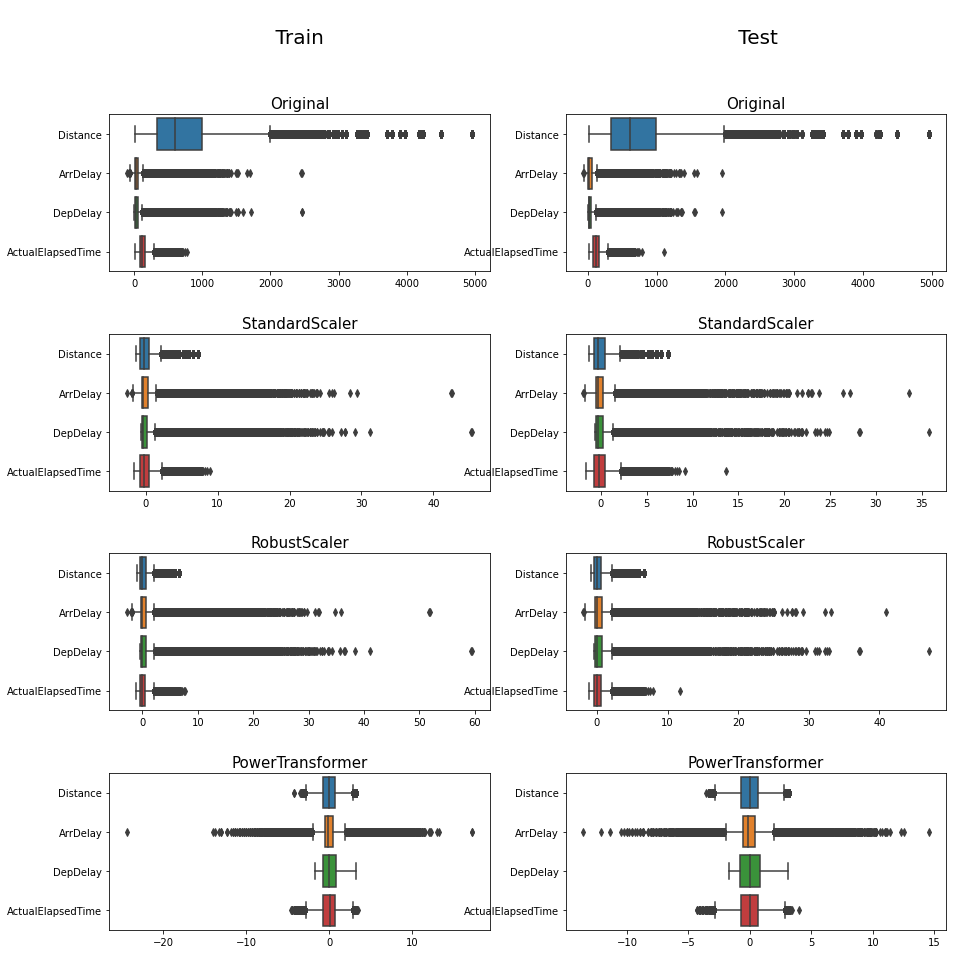

In [34]:
# Graphical summary of scaled numerical features
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.4)
fig.suptitle('\n    Train' + ' ' * 65 + 'Test', fontsize=20)

plt.subplot(4,2,1)
plt.title('Original', fontsize=15)
sns.boxplot(data=df_train[num_cols], orient='h')

plt.subplot(4,2,3)
plt.title('StandardScaler', fontsize=15)
sns.boxplot(data=train_sc_std, orient='h')

plt.subplot(4,2,5)
plt.title('RobustScaler', fontsize=15)
sns.boxplot(data=train_sc_robust, orient='h')

plt.subplot(4,2,7)
plt.title('PowerTransformer', fontsize=15)
sns.boxplot(data=train_sc_power, orient='h')

plt.subplot(4,2,2)
plt.title('Original', fontsize=15)
sns.boxplot(data=df_test[num_cols], orient='h')

plt.subplot(4,2,4)
plt.title('StandardScaler', fontsize=15)
sns.boxplot(data=test_sc_std, orient='h')

plt.subplot(4,2,6)
plt.title('RobustScaler', fontsize=15)
sns.boxplot(data=test_sc_robust, orient='h')

plt.subplot(4,2,8)
plt.title('PowerTransformer', fontsize=15)
sns.boxplot(data=test_sc_power, orient='h');

In [35]:
# Statistical summary of polynomial features
for col, col_df in zip(num_cols, ['x0', 'x1', 'x2', 'x3']):
    print(col + ':')
    print('=' * (len(col) + 1))
    print('Train:')
    train_original = train_poly[col_df].describe()
    train_2 = pd.DataFrame(train_poly[col_df+'^2'].describe())
    train_3 = pd.DataFrame(train_poly[col_df+'^3'].describe())
    train_stats = pd.concat([train_original, train_2, train_3], axis=1)
    train_stats.columns = [col, col+'^2', col+'^3']
    print(train_stats)
    print('\nTest:')
    test_original = test_poly[col_df].describe()
    test_2 = pd.DataFrame(test_poly[col_df+'^2'].describe())
    test_3 = pd.DataFrame(test_poly[col_df+'^3'].describe())
    test_stats = pd.concat([test_original, test_2, test_3], axis=1)
    test_stats.columns = [col, col+'^2', col+'^3']
    print(test_stats)
    print()

Distance:
Train:
           Distance    Distance^2    Distance^3
count  1.446276e+06  1.446276e+06  1.446276e+06
mean   7.647346e+02  9.137201e+05  1.493131e+09
std    5.734992e+02  1.482243e+06  4.228162e+09
min    1.100000e+01  1.210000e+02  1.331000e+03
25%    3.380000e+02  1.142440e+05  3.861447e+07
50%    6.060000e+02  3.672360e+05  2.225450e+08
75%    9.970000e+02  9.940090e+05  9.910270e+08
max    4.962000e+03  2.462144e+07  1.221716e+11

Test:
            Distance    Distance^2    Distance^3
count  482095.000000  4.820950e+05  4.820950e+05
mean      765.590516  9.168038e+05  1.503468e+09
std       575.044071  1.492026e+06  4.277586e+09
min        24.000000  5.760000e+02  1.382400e+04
25%       338.000000  1.142440e+05  3.861447e+07
50%       606.000000  3.672360e+05  2.225450e+08
75%       998.000000  9.960040e+05  9.940120e+08
max      4962.000000  2.462144e+07  1.221716e+11

ArrDelay:
Train:
           ArrDelay    ArrDelay^2    ArrDelay^3
count  1.446276e+06  1.446276e+06  1.

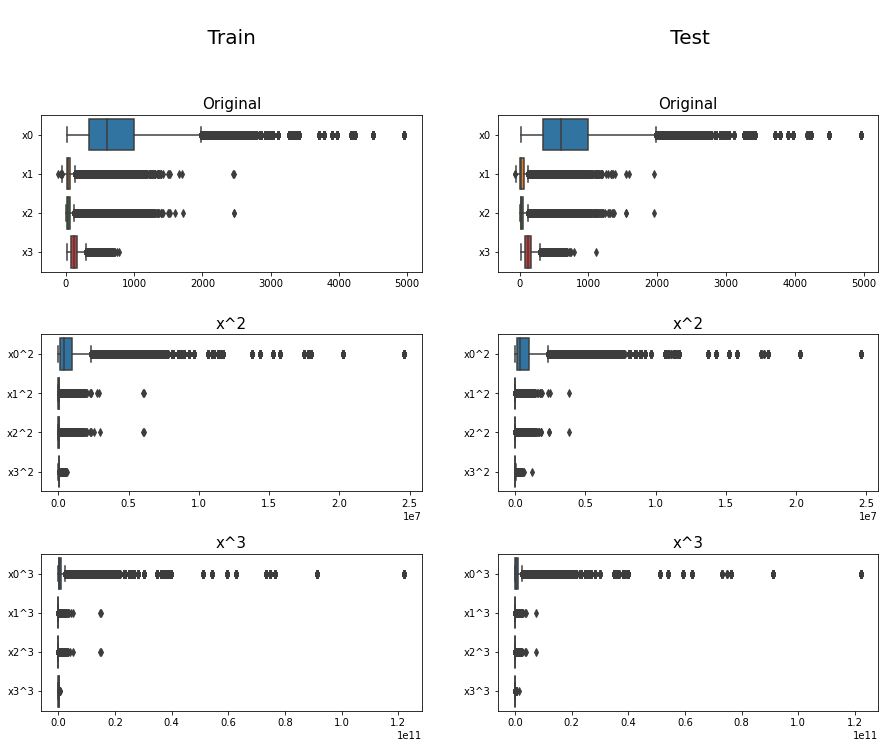

In [36]:
# Graphical summary of scaled numerical columns
fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.4)
fig.suptitle('\n    Train' + ' ' * 65 + 'Test', fontsize=20)

plt.subplot(4,2,1)
plt.title('Original', fontsize=15)
sns.boxplot(data=train_poly[['x0', 'x1', 'x2', 'x3']], orient='h')

plt.subplot(4,2,3)
plt.title('x^2', fontsize=15)
sns.boxplot(data=train_poly[['x0^2', 'x1^2', 'x2^2', 'x3^2']], orient='h')

plt.subplot(4,2,5)
plt.title('x^3', fontsize=15)
sns.boxplot(data=train_poly[['x0^3', 'x1^3', 'x2^3', 'x3^3']], orient='h');

plt.subplot(4,2,2)
plt.title('Original', fontsize=15)
sns.boxplot(data=test_poly[['x0', 'x1', 'x2', 'x3']], orient='h')

plt.subplot(4,2,4)
plt.title('x^2', fontsize=15)
sns.boxplot(data=test_poly[['x0^2', 'x1^2', 'x2^2', 'x3^2']], orient='h')

plt.subplot(4,2,6)
plt.title('x^3', fontsize=15)
sns.boxplot(data=test_poly[['x0^3', 'x1^3', 'x2^3', 'x3^3']], orient='h');

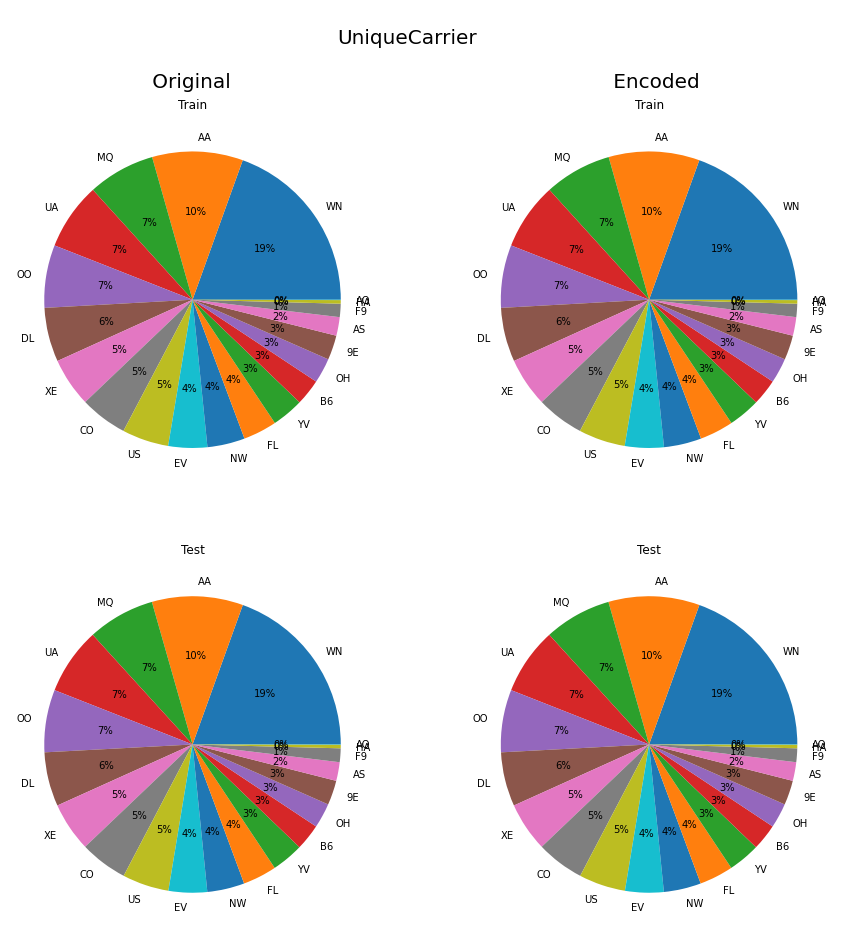

In [37]:
# Graphical summary of categorical variables
fig = plt.figure(figsize=(15,15))
fig.suptitle('\nUniqueCarrier\n\n      Original' + ' ' * 60 + 'Encoded', fontsize=20)

plt.subplot(2,2,1)
counts = train_label.Carrier.value_counts().reset_index()
plt.pie(counts.Carrier, labels = ec_label.inverse_transform(counts['index']), autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,2)
counts = df_train.UniqueCarrier.value_counts().reset_index()
plt.pie(counts.UniqueCarrier, labels = counts['index'], autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,3)
counts = test_label.Carrier.value_counts().reset_index()
plt.pie(counts.Carrier, labels = ec_label.inverse_transform(counts['index']), autopct='%.0f%%')
plt.title('Test')

plt.subplot(2,2,4)
counts = df_test.UniqueCarrier.value_counts().reset_index()
plt.pie(counts.UniqueCarrier, labels = counts['index'], autopct='%.0f%%')
plt.title('Test');

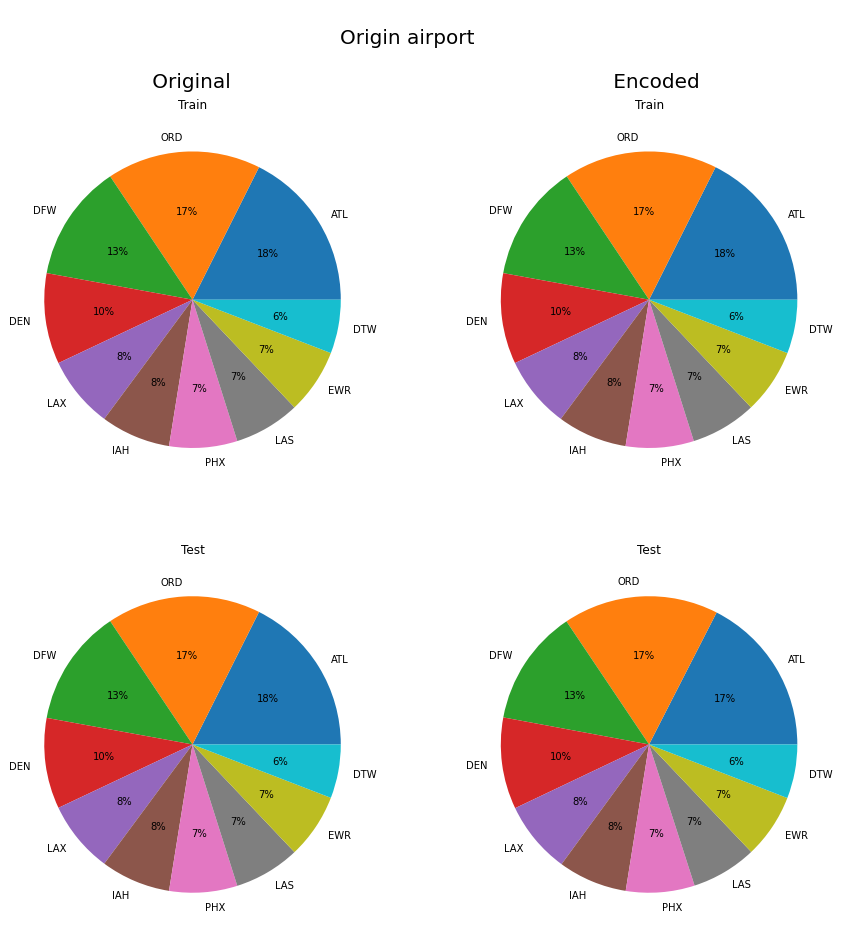

In [38]:
# Graphical summary of categorical variables
ec_freq_origin_rev = ec_freq_origin.reset_index()
ec_freq_origin_rev.set_index(0, inplace=True)

fig = plt.figure(figsize=(15,15))
fig.suptitle('\nOrigin airport\n\n      Original' + ' ' * 60 + 'Encoded', fontsize=20)

plt.subplot(2,2,1)
counts = train_freq.Origin.value_counts().reset_index()[:10]
plt.pie(counts.Origin, labels = ec_freq_origin_rev.loc[counts['index']].Origin, autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,2)
counts = df_train.Origin.value_counts().reset_index()[:10]
plt.pie(counts.Origin, labels = counts['index'], autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,3)
counts = test_freq.Origin.value_counts().reset_index()[:10]
plt.pie(counts.Origin, labels = ec_freq_origin_rev.loc[counts['index']].Origin, autopct='%.0f%%')
plt.title('Test')

plt.subplot(2,2,4)
counts = df_test.Origin.value_counts().reset_index()[:10]
plt.pie(counts.Origin, labels = counts['index'], autopct='%.0f%%')
plt.title('Test');

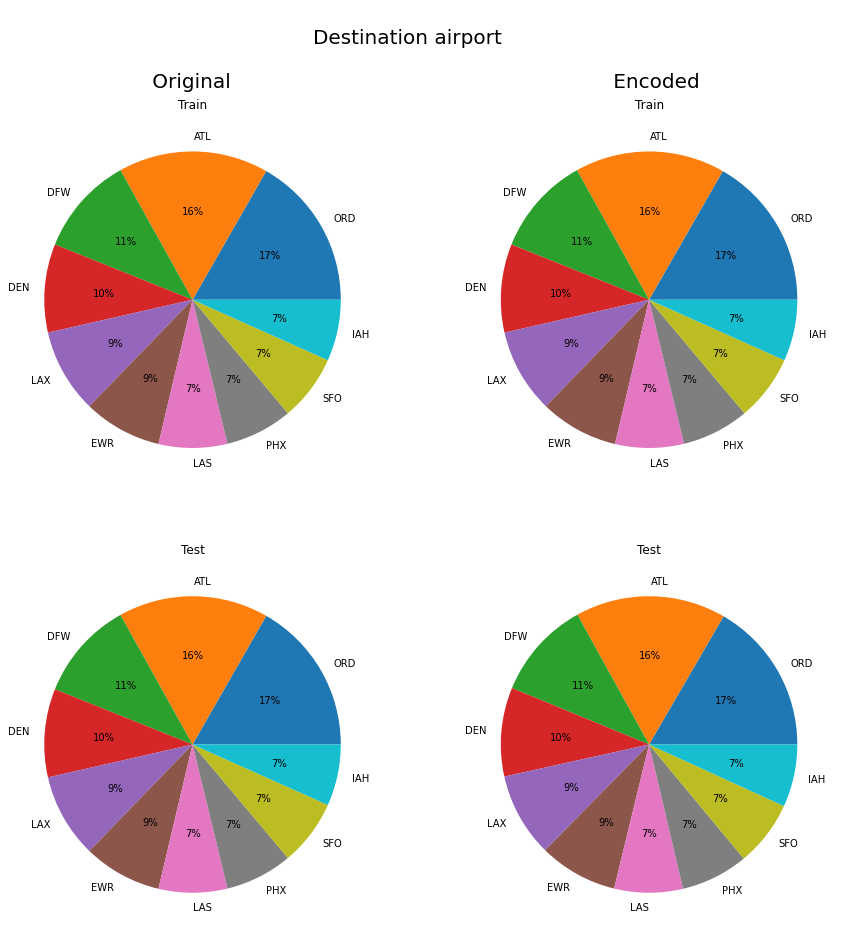

In [39]:
# Graphical summary of categorical variables
ec_freq_dest_rev = ec_freq_dest.reset_index()
ec_freq_dest_rev.set_index(0, inplace=True)

fig = plt.figure(figsize=(15,15))
fig.suptitle('\nDestination airport\n\n      Original' + ' ' * 60 + 'Encoded', fontsize=20)

plt.subplot(2,2,1)
counts = train_freq.Dest.value_counts().reset_index()[:10]
plt.pie(counts.Dest, labels = ec_freq_dest_rev.loc[counts['index']].Dest, autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,2)
counts = df_train.Dest.value_counts().reset_index()[:10]
plt.pie(counts.Dest, labels = counts['index'], autopct='%.0f%%')
plt.title('Train')

plt.subplot(2,2,3)
counts = test_freq.Dest.value_counts().reset_index()[:10]
plt.pie(counts.Dest, labels = ec_freq_dest_rev.loc[counts['index']].Dest, autopct='%.0f%%')
plt.title('Test')

plt.subplot(2,2,4)
counts = df_test.Dest.value_counts().reset_index()[:10]
plt.pie(counts.Dest, labels = counts['index'], autopct='%.0f%%')
plt.title('Test');